In [3]:
import tensorflow as tf

In [4]:
import keras

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [6]:
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization
import os


In [7]:
SIZE=128

In [8]:
train_images=[]
train_labels=[]

In [9]:
for directory_path in glob.glob("/Users/akshatagaikwad/Downloads/archive (2)/train/*"):
    label = os.path.basename(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            train_images.append(img)
            train_labels.append(label)
        else:
            print(f"Failed to read image: {img_path}")


In [10]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [11]:
print(train_images.shape)
print(train_labels.shape)


(11879, 128, 128, 3)
(11879,)


In [12]:
test_images=[]
test_labels=[]

In [13]:
for directory_path in glob.glob("/Users/akshatagaikwad/Downloads/archive (2)/test/*"):
    t_label = os.path.basename(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            test_images.append(img)
            test_labels.append(t_label)
        else:
            print(f"Failed to read image: {img_path}")

In [14]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [15]:
test_images.shape


(2000, 128, 128, 3)

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [20]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [21]:
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

In [22]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (11879, 128, 128, 3)
x_test shape: (2000, 128, 128, 3)


In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [24]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (11879, 128, 128, 3)
x_test shape: (2000, 128, 128, 3)


In [23]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential, Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


activation = 'sigmoid'
SIZE = 128

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())
feature_extractor.add(Flatten())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
feature_extractor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,336 (259.12 KB)

 Trainable params: 65,952 (257.62 KB)

 Non-trainable params: 384 (1.50 KB)

In [25]:
input_layer = Input(shape=(SIZE, SIZE, 3))
features = feature_extractor(input_layer)
intermediate_model = Model(inputs=input_layer, outputs=features)

In [27]:
intermediate_model.save('cnn_feature_extractor.h5')

In [28]:
X_train_features = intermediate_model.predict(x_train)
X_test_features = intermediate_model.predict(x_test)


372/372 ━━━━━━━━━━━━━━━━━━━━ 122s 327ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step


In [29]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [30]:
pipe.fit(X_train_features, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [19]:
import joblib

In [32]:
joblib.dump(pipe, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [33]:
y_pred=pipe.predict(X_test_features)


In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.943


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The prediction for this image is:  ['Malignant']
The actual label for this image is:  Malignant


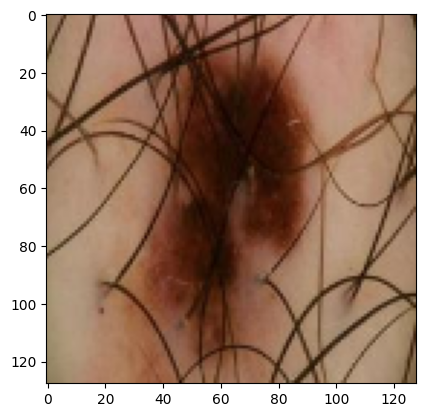

In [71]:
n=1
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=intermediate_model.predict(input_img)
prediction_RF = pipe.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[943  57]
 [ 57 943]]


In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sb

<Axes: >

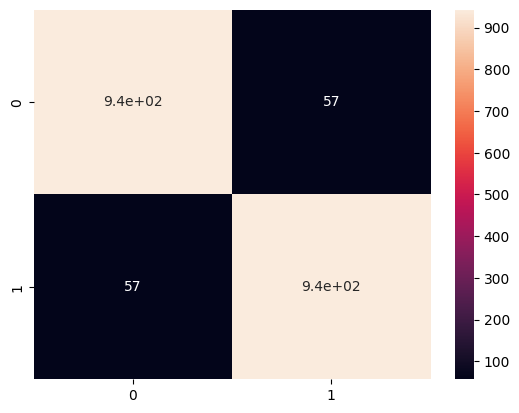

In [38]:
sb.heatmap(cm,annot=True)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

